In [1]:
from utils import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_mean_approx_ratios(final_df):
    """
    Plots the mean approximation ratios versus problem size for each algorithm.
    
    Parameters:
    final_df (pd.DataFrame): A DataFrame that contains columns 'algorithm', 'n', and 'approx'
    """
    # Create a new figure
    plt.figure(dpi=200)
    final_df['approx'] = final_df['OPT']-final_df['cut']

    colors = {

            'TS':'#f5945c',
            'EO':'#fec76f',
            'Greedy':'#71a3c1',
            'Cplex': '#be95be'
    }

    # Iterate through each group of the DataFrame grouped by 'algorithm'
    for algorithm, group_df in final_df.groupby('algorithm'):

        data = []

        color = colors.get(algorithm,'black')

        # Iterate through each sub-group grouped by 'n' (problem size)
        for size, secondary_group_df in group_df.groupby('n'):
            mean_approx_ratio = secondary_group_df['approx'].mean()  # Compute mean approximation ratio
            data.append((int(size), mean_approx_ratio))

        # Sort the data by problem size (n)
        data.sort()

        # Unzip the data into sizes and mean_approx_ratios
        sizes = [item[0] for item in data]
        mean_approx_ratios = [item[1] for item in data]

        # Create the line plot with customized marker
        sns.lineplot(x=sizes, y=mean_approx_ratios, linestyle='--',
                      marker='o', markersize=8, label=algorithm, 
                      legend=False,
                      color= color)

        
        fontsize = 12
        if algorithm =='TS':
            plt.text(sizes[-1] + 100, mean_approx_ratios[-1]+40, 'Tabu Search', fontsize = fontsize, verticalalignment='center')

        elif algorithm =='EO':
            plt.text(sizes[-1] + 100, mean_approx_ratios[-1]-50, 'Extremal\nOptimization', fontsize = fontsize, 
                     verticalalignment='center')

        elif algorithm =='Greedy':
            plt.text(sizes[-1] + 100, mean_approx_ratios[-1], 'Greedy', fontsize = fontsize, verticalalignment='center')

        else:
            plt.text(sizes[-1] + 100, mean_approx_ratios[-1], algorithm.upper(), fontsize = fontsize, verticalalignment='center')
        plt.grid(True, alpha=0.5)
        sns.despine()
        # plt.grid()

        # Add scatter plot to control marker size proportional to 'size'
        # plt.scatter(sizes, mean_approx_ratios, s=[s*0.01 for s in sizes], label=f'{algorithm}')

    # Add labels, title, and legend
    plt.xlabel('|V|')
    plt.ylabel('Mean deviation from the best known')
    plt.title('Mean deviation vs Graph Size')
    # plt.legend()

    # Display the plot
    plt.show()


ER weighted


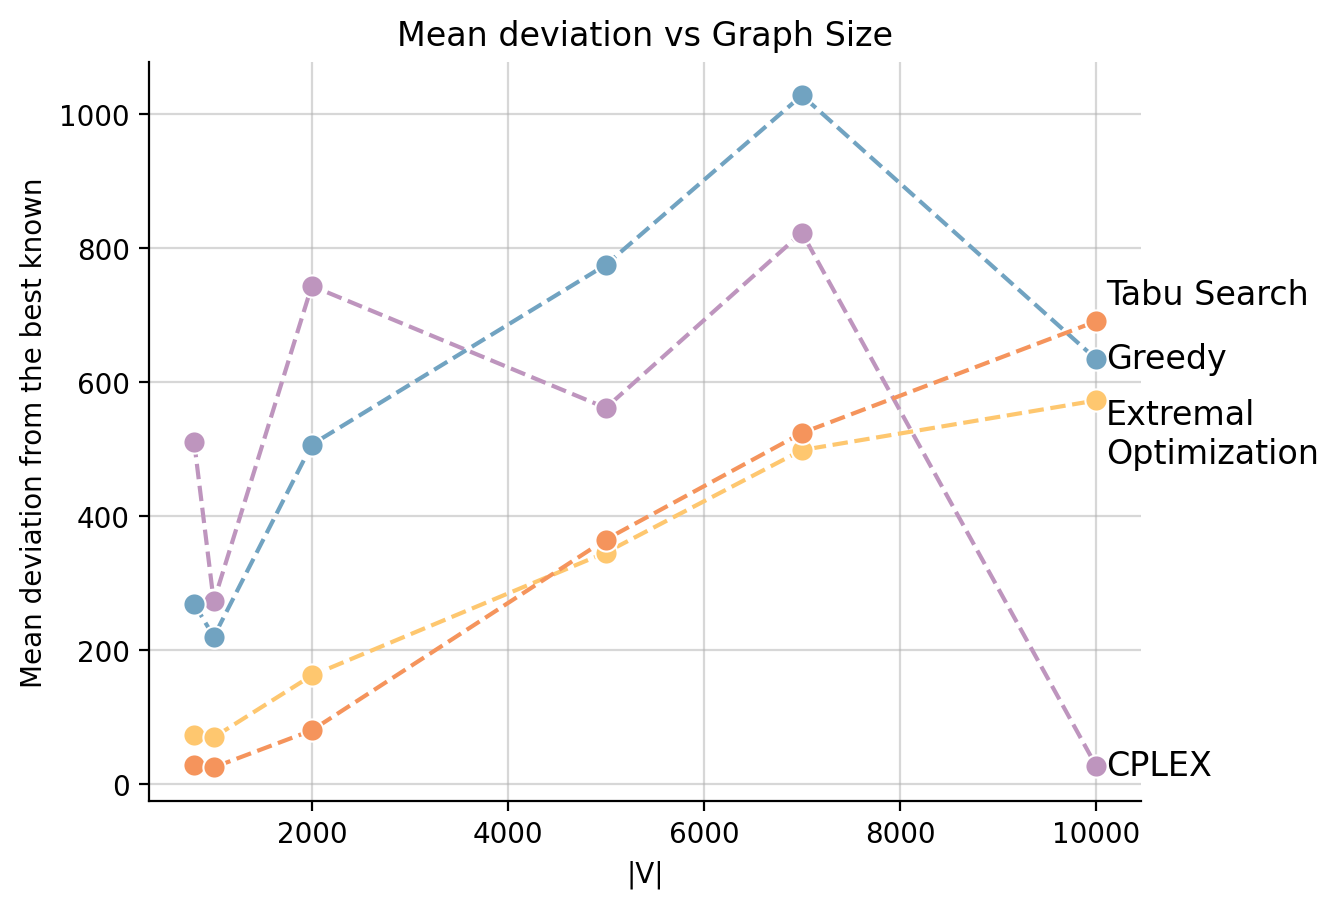

ER unweighted


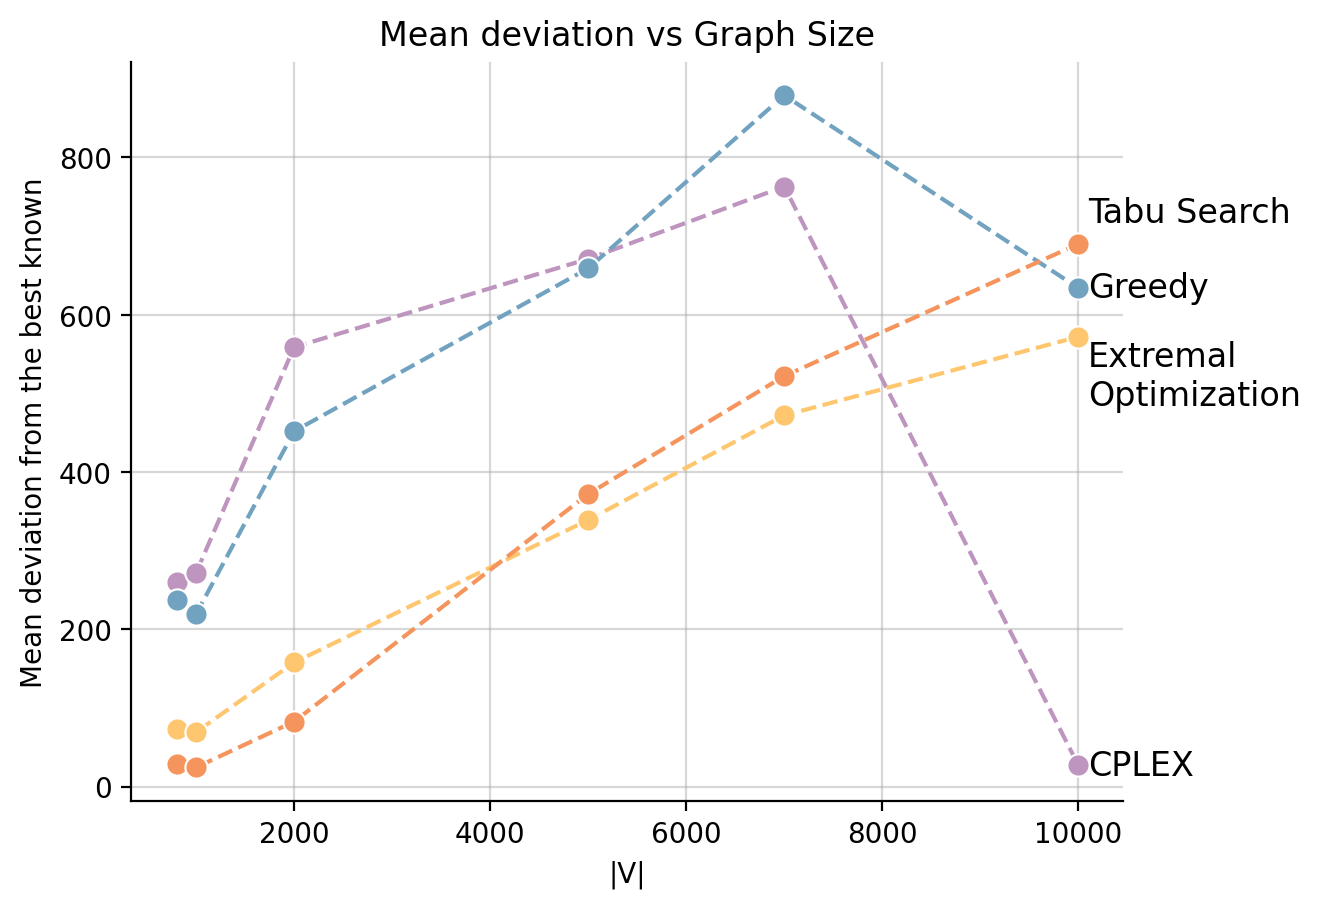

torodial weighted


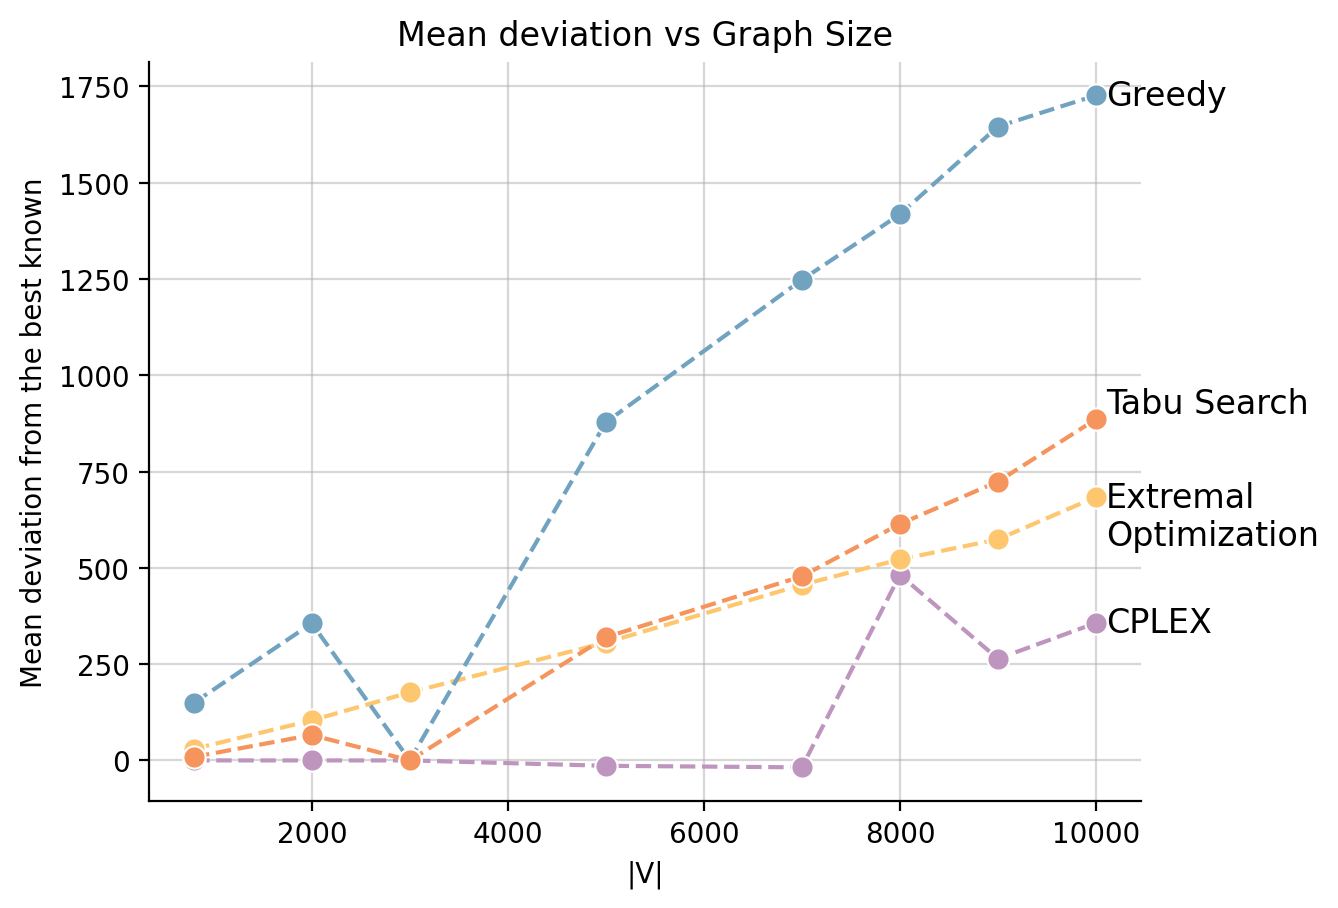

planar weighted


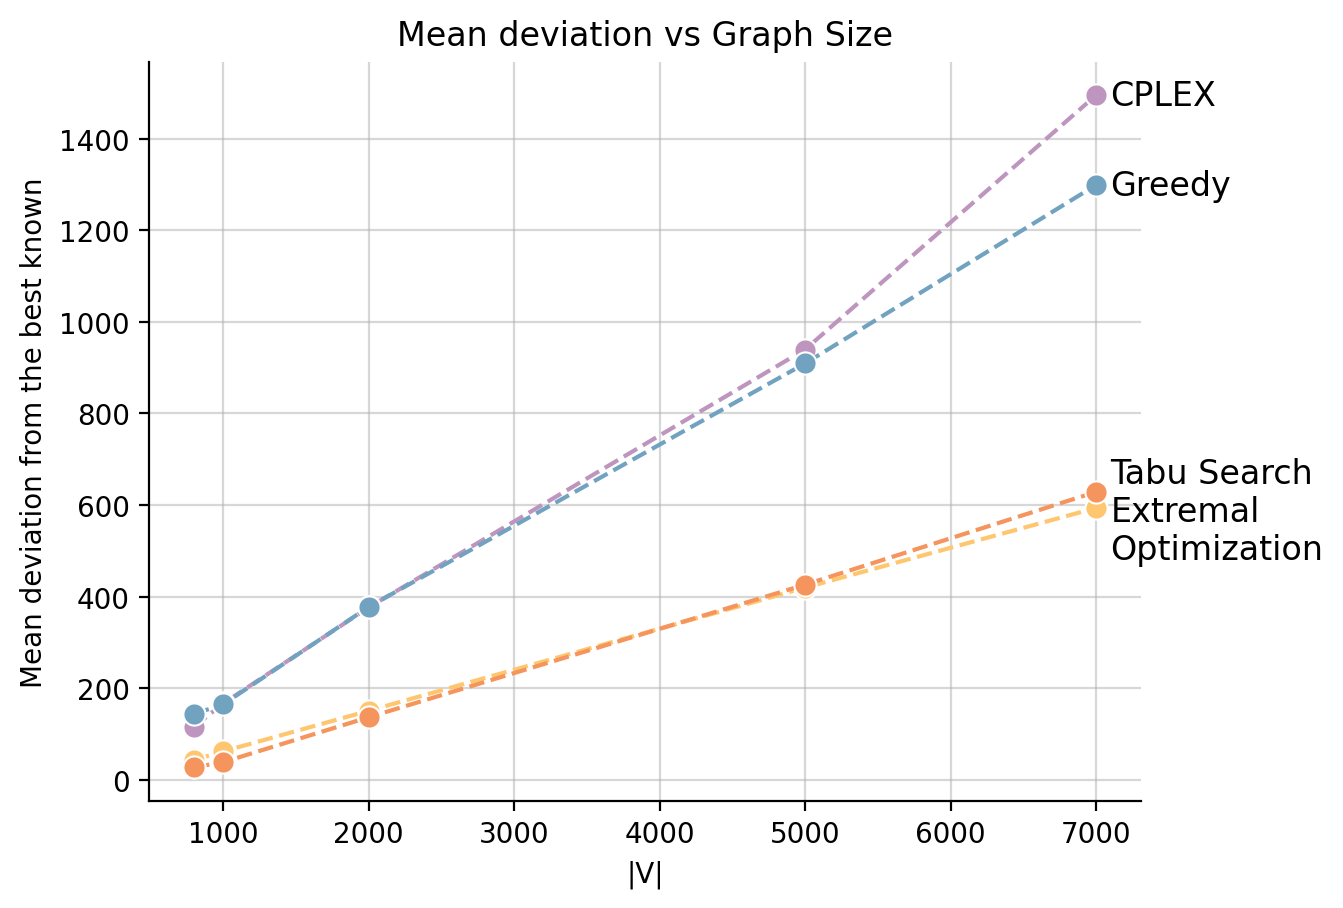

planar unweighted


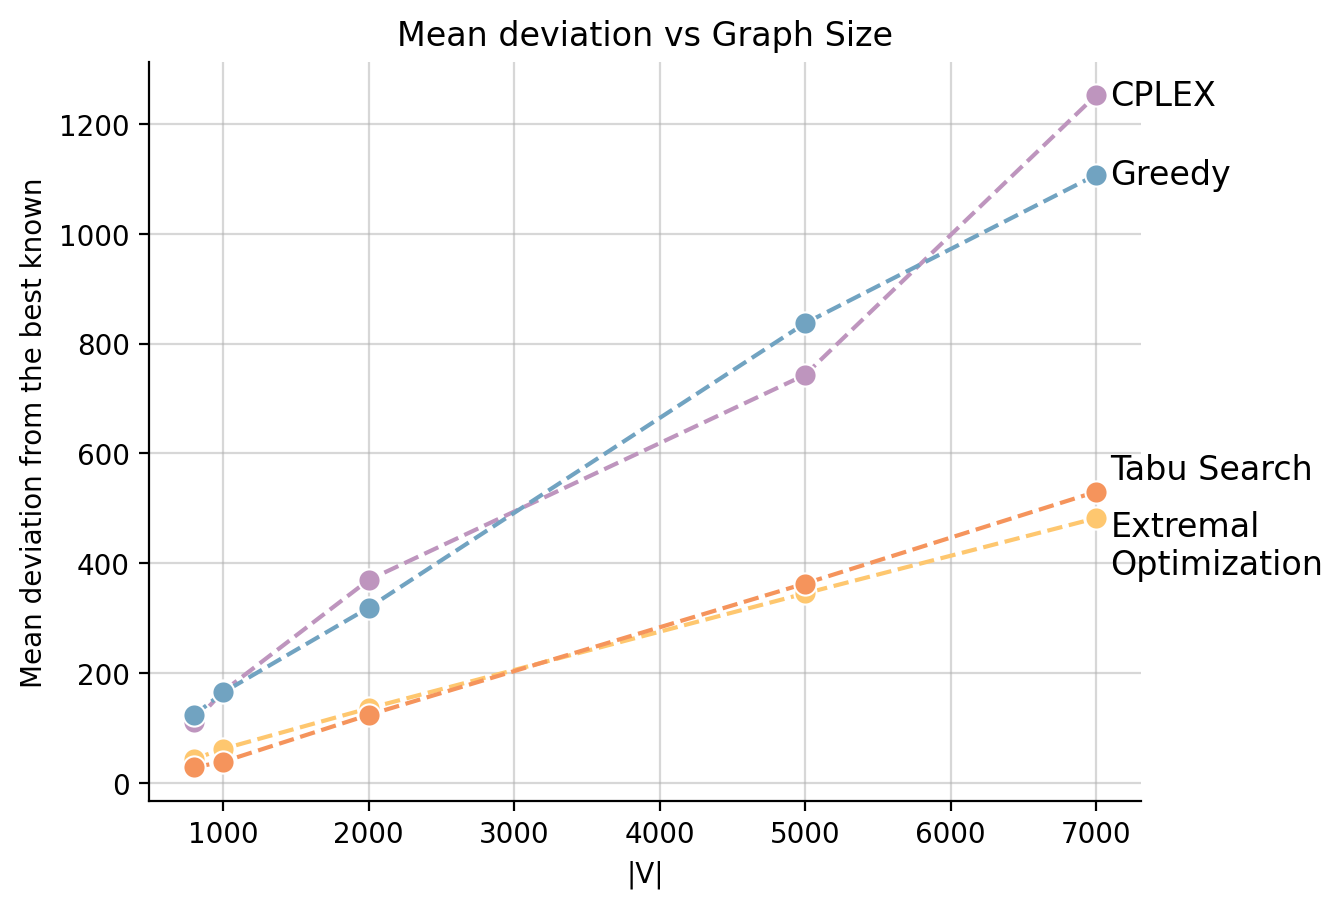

In [3]:
import os
import re
import pandas as pd

# Ensure the function load_from_pickle is defined or imported
# Example function definition:
# def load_from_pickle(filepath):
#     with open(filepath, 'rb') as f:
#         return pickle.load(f)

algorithms = ['Greedy', 'TS', 'EO', 'Cplex']
distributions = [('ER', 'weighted'), ('ER', 'unweighted'), ('torodial', 'weighted'), ('planar', 'weighted'), ('planar', 'unweighted')]

for distribution, weighted in distributions:
    dfs = []

    for algorithm in algorithms:
        root_folder = f'data/{algorithm}'

        # Ensure the root folder exists
        if not os.path.exists(root_folder):
            print(f"Warning: {root_folder} does not exist.")
            continue

        files = os.listdir(root_folder)

        for file in files:
            # Filter for files that match the distribution and weighted pattern
            if file.startswith(distribution) and file.endswith(weighted):
                results_path = os.path.join(root_folder, file, 'results')

                # Check if results file exists
                if not os.path.exists(results_path):
                    print(f"Warning: {results_path} does not exist.")
                    continue

                # Load the data from the pickle file
                df = load_from_pickle(results_path,quiet = True)
                
                # Extract numerical part of filename for 'n'
                df['n'] = re.findall(r'\d+', file)[0] if re.findall(r'\d+', file) else None
                df['algorithm'] = algorithm

                # Load the optimal data
                optimal_path = f'../data/testing/{file}/optimal'
                
                
                if not os.path.exists(optimal_path):
                    print(f"Warning: {optimal_path} does not exist.")
                    continue
                
                df['OPT'] = load_from_pickle(optimal_path,quiet = True)['OPT'].tolist()

                dfs.append(df)

    # Concatenate DataFrames if any are found
    if dfs:
        final_df = pd.concat(dfs, ignore_index=True)
    else:
        print(f"No data found for distribution {distribution} and weighted {weighted}.")

    print(distribution, weighted)
    plot_mean_approx_ratios(final_df=final_df)


In [4]:
load_from_pickle(optimal_path)['OPT'].tolist()

Data has been loaded from ../data/testing/planar_800vertices_unweighted/optimal


[3063, 3050, 3052, 3047]